In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
X = np.random.randn(20)
Y = X * 3 + 2 + np.random.randn(20)

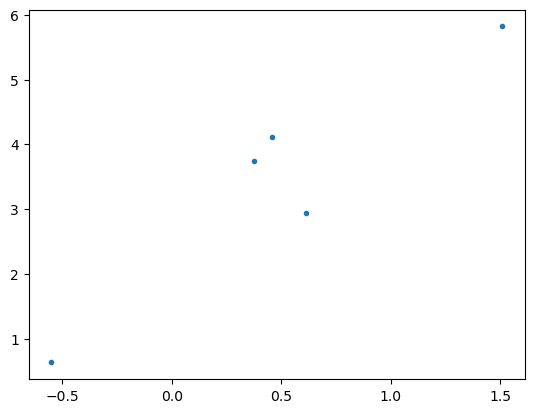

In [11]:
plt.plot(X, Y, ".");

In [13]:
A1 = np.vstack([X, X**0]).T
A1

array([[ 1.50715877,  1.        ],
       [ 0.61360101,  1.        ],
       [-0.55129797,  1.        ],
       [ 0.45808716,  1.        ],
       [ 0.37351136,  1.        ]])

In [15]:
theta1 = np.linalg.solve(A1.T@A1, A1.T@Y)
theta1

array([2.43464501, 2.28150816])

In [16]:

A2 = np.vstack([X**2, X, X**0]).T
theta2 = np.linalg.solve(A2.T@A2, A2.T@Y)
theta2

array([-0.35754136,  2.77581381,  2.35374632])

In [17]:

A3 = np.vstack([X**3, X**2, X, X**0]).T
theta3 = np.linalg.solve(A3.T@A3, A3.T@Y)
theta3

array([ 6.08093252, -9.09088344,  0.60277649,  4.74242184])

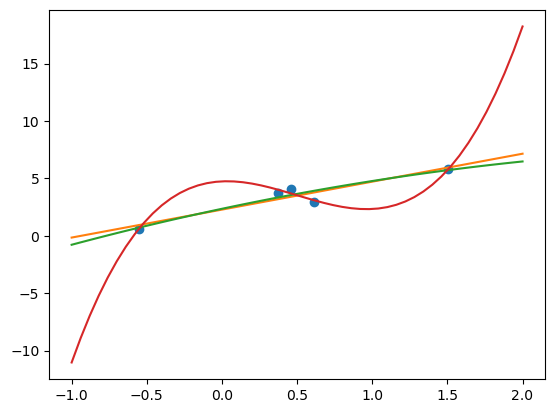

In [23]:
X_m = np.linspace(-1, 2, 51)

Y_m1 = theta1[0] * X_m + theta1[1]
Y_m2 = theta2[0] * X_m**2 + theta2[1] * X_m + theta2[2]
Y_m3 = theta3[0] * X_m**3 + theta3[1] * X_m**2 + theta3[2] * X_m + theta3[3]

plt.plot(X, Y, "o")
plt.plot(X_m, Y_m1)
plt.plot(X_m, Y_m2)
plt.plot(X_m, Y_m3)

In [25]:
def regression(X, Y, n):
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    theta = np.linalg.solve(A.T@A, A.T@Y)
    return theta

In [29]:
theta = regression(X, Y, 3)

In [28]:
def model(X, theta):
    n = len(theta)
    Y = np.zeros_like(X)
    for w, i in zip(theta, reversed(range(n))):
        Y += w * X**i
    return Y

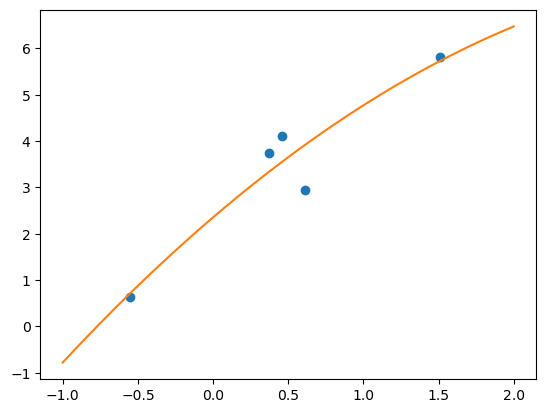

In [46]:
X_training = X[:10]
Y_training = Y[:10]

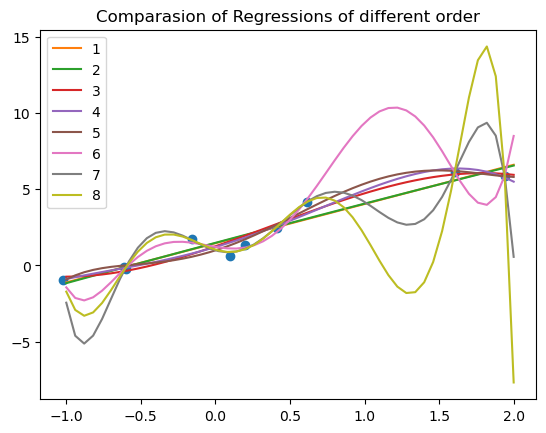

In [40]:
plt.plot(X_training, Y_training, "o")

for n in range(2, 10):
    theta = regression(X_training, Y_training, n)
    Y_m = model(X_m, theta)
    plt.plot(X_m, Y_m, label=str(n-1))

plt.title("Comparasion of Regressions of different order")
plt.legend();

In [41]:
Es = []
Ns = []
for n in range(2, 11):
    theta = regression(X_training, Y_training, n)
    Y_training_predict = model(X_training, theta)
    E = Y_training_predict - Y_training
    E = np.dot(E, E)/len(E)
    Ns.append(n)
    Es.append(E)

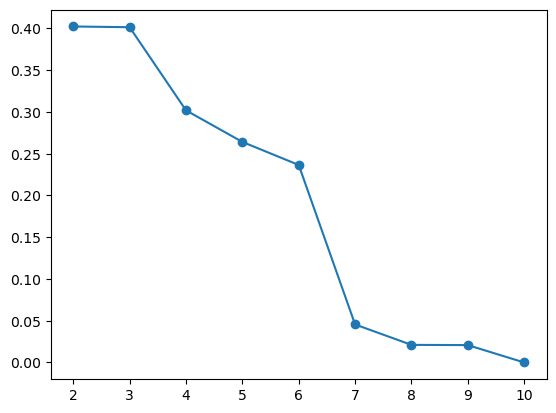

In [43]:
plt.plot(Ns, Es, "o-")

In [45]:
X_test = X[10:]
Y_test = Y[10:]

(0.0, 2.0)

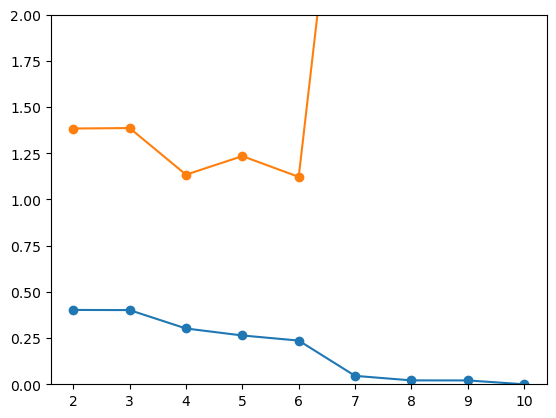

In [52]:
Es = []
Ns = []
for n in range(2, 11):
    theta = regression(X_training, Y_training, n)
    Y_training_predict = model(X_training, theta)
    E = Y_training_predict - Y_training
    E = np.dot(E, E)/len(E)
    Ns.append(n)
    Es.append(E)

plt.plot(Ns, Es, "o-")


Es = []
Ns = []
for n in range(2, 11):
    theta = regression(X_training, Y_training, n)
    Y_test_predict = model(X_test, theta)
    E = Y_test_predict - Y_test
    E = np.dot(E, E)/len(E)
    Ns.append(n)
    Es.append(E)

plt.plot(Ns, Es, "o-")
plt.ylim(0, 2)

In [53]:
def ridge_regression(X, Y, n, l):
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T   
    I = np.identity(n) 
    theta = np.linalg.solve(A.T@A+l*I, A.T@Y)
    return theta

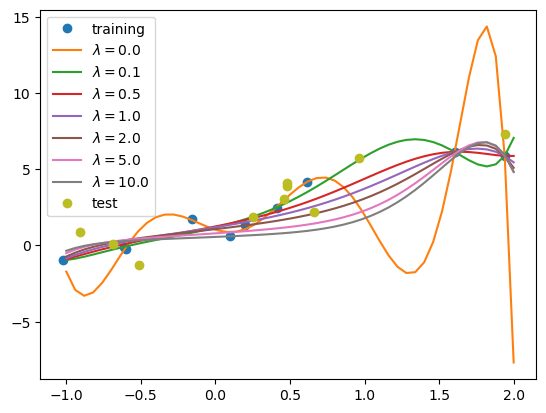

In [66]:
plt.plot(X_training, Y_training, "o", label="training")

for l in [0.0, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]:
    theta = ridge_regression(X_training, Y_training, 9, l)
    Y_m = model(X_m, theta)
    plt.plot(X_m, Y_m, label=r"$\lambda={}$".format(l))

plt.plot(X_test, Y_test, "o", label="test")
plt.legend()

In [72]:
X_good = np.random.randn(5)
Y_good = X_good * 3 + 2 + np.random.randn(5)
X_bad = np.random.randn(10)
Y_bad = X_bad * 3 + 2 + np.random.randn(10)*3

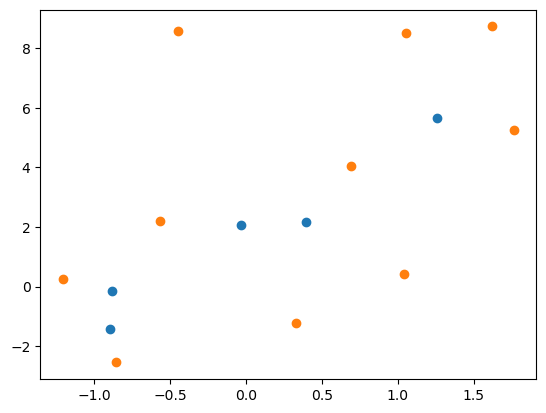

In [73]:
plt.plot(X_good, Y_good, "o")
plt.plot(X_bad, Y_bad, "o");

In [76]:
X = np.hstack([X_good, X_bad])
Y = np.hstack([Y_good, Y_bad])

In [80]:
C = np.diag([1/1]*5 + [1/9]*10)


In [81]:
def weighted_regression(X, Y, W, n):
    C = np.diag(W)
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    theta = np.linalg.solve(A.T@C@A, A.T@C@Y)
    return theta

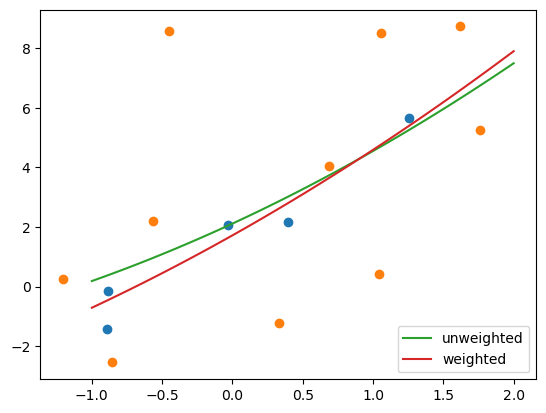

In [86]:
plt.plot(X_good, Y_good, "o")
plt.plot(X_bad, Y_bad, "o");

theta = regression(X, Y, 3)
plt.plot(X_m, model(X_m, theta), label="unweighted")

theta = weighted_regression(X, Y, [1/1]*5+[1/9]*10, 3)
plt.plot(X_m, model(X_m, theta), label="weighted")

plt.legend()